In [1]:
import numpy as np
import pandas as pd

In [9]:
df=pd.read_csv('test.csv', encoding= 'unicode_escape')
df

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797,27400.0,105
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044,2381740.0,18
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265,470.0,164
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272,1246700.0,26
...,...,...,...,...,...,...,...,...,...
3529,e5f0e6ef4b,"its at 3 am, im very tired but i can`t sleep ...",negative,noon,21-30,Nicaragua,6624554,120340.0,55
3530,416863ce47,All alone in this old house again. Thanks for...,positive,night,31-45,Niger,24206644,1266700.0,19
3531,6332da480c,I know what you mean. My little dog is sinkin...,negative,morning,46-60,Nigeria,206139589,910770.0,226
3532,df1baec676,_sutra what is your next youtube video gonna b...,positive,noon,60-70,North Korea,25778816,120410.0,214


# Data Cleaning and Preprocessing:
 - Guide them in cleaning the text data, which may include removing special characters, handling
missing values, and lowercasing the text.
 - Instruct them to tokenize the text and remove stop words.
 - Encourage the exploration of techniques like stemming or lemmatization.

In [10]:
import re

def remove_special_characters(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text


In [13]:
# Drop rows with missing text
df.dropna(subset=['textID'], inplace=True)
df['textID'].fillna('NA', inplace=True)


In [14]:
df['textID'] = df['textID'].str.lower()


In [19]:
import nltk

# Download the "punkt" resource
nltk.download('punkt')

# Now, you should be able to use word_tokenize()
from nltk.tokenize import word_tokenize

# Example usage:
df['tokenized_text'] = df['textID'].apply(word_tokenize)



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\usc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [17]:
import nltk

# Download the "stopwords" resource
nltk.download('stopwords')

# Now, you can import stopwords and use them
from nltk.corpus import stopwords

# Example usage:
stop_words = set(stopwords.words('english'))



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\usc\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [24]:
import nltk
nltk.download('omw-1.4')


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\usc\AppData\Roaming\nltk_data...


True

In [25]:
import nltk

# Download the "wordnet" resource
nltk.download('wordnet')

# Now, you should be able to use lemmatization
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_text(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

# Example usage:
df['lemmatized_text'] = df['tokenized_text'].apply(lemmatize_text)



[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\usc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [27]:
df

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²),tokenized_text,stemmed_text,lemmatized_text
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346,652860.0,60,[f87dea47db],[f87dea47db],[f87dea47db]
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797,27400.0,105,[96d74cb729],[96d74cb729],[96d74cb729]
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044,2381740.0,18,[eee518ae67],[eee518ae67],[eee518ae67]
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265,470.0,164,[01082688c6],[01082688c6],[01082688c6]
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272,1246700.0,26,[33987a8ee5],[33987a8ee5],[33987a8ee5]
...,...,...,...,...,...,...,...,...,...,...,...,...
3529,e5f0e6ef4b,"its at 3 am, im very tired but i can`t sleep ...",negative,noon,21-30,Nicaragua,6624554,120340.0,55,[e5f0e6ef4b],[e5f0e6ef4b],[e5f0e6ef4b]
3530,416863ce47,All alone in this old house again. Thanks for...,positive,night,31-45,Niger,24206644,1266700.0,19,[416863ce47],[416863ce47],[416863ce47]
3531,6332da480c,I know what you mean. My little dog is sinkin...,negative,morning,46-60,Nigeria,206139589,910770.0,226,[6332da480c],[6332da480c],[6332da480c]
3532,df1baec676,_sutra what is your next youtube video gonna b...,positive,noon,60-70,North Korea,25778816,120410.0,214,[df1baec676],[df1baec676],[df1baec676]


# Exploratory Data Analysis (EDA):
 - Ask them to perform EDA to gain insights into the dataset. This may include visualizations of word
frequency, sentiment distribution, and word clouds.


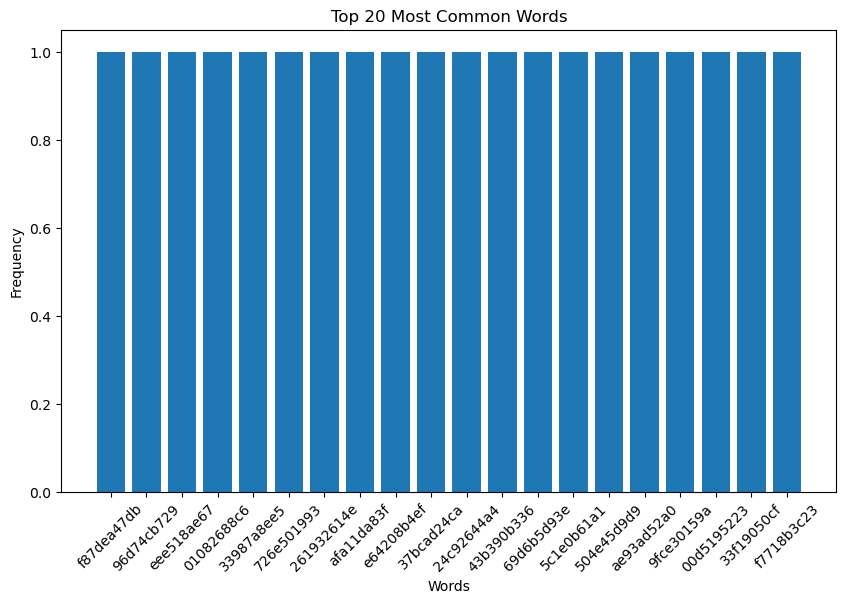

In [28]:
import matplotlib.pyplot as plt
from collections import Counter

# Combine all tokenized text into a single list
all_tokens = [word for sublist in df['tokenized_text'] for word in sublist]

# Calculate word frequencies
word_freq = Counter(all_tokens)

# Plot the top N words
top_words = word_freq.most_common(20)
plt.figure(figsize=(10, 6))
plt.bar(*zip(*top_words))
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Words')
plt.show()


# 4.Feature Engineering:
 - Help them create relevant features from the text data, such as TF-IDF (Term Frequency-Inverse
Document Frequency) vectors or word embeddings.

In [32]:
!pip install textblob


     ------------------------------------ 636.8/636.8 kB 912.0 kB/s eta 0:00:00


# Model Selection:
 - Allow them to choose machine learning models (e.g., logistic regression, support vector machines) or
deep learning models (e.g., recurrent neural networks, transformers) for sentiment analysis.

In [33]:
from textblob import TextBlob

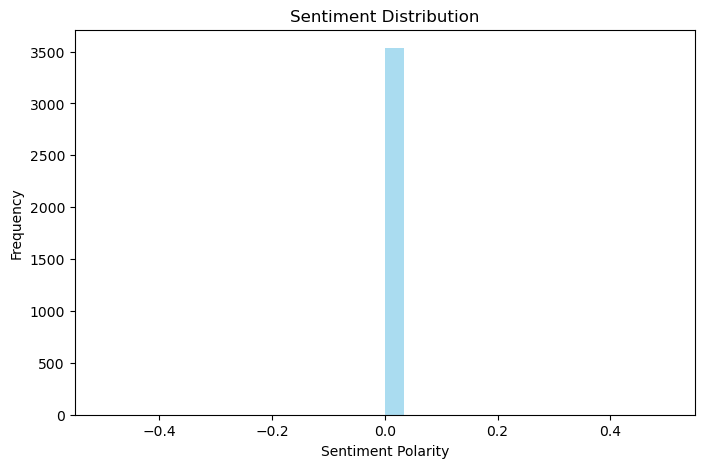

In [34]:
from textblob import TextBlob

# Function to get sentiment polarity
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply sentiment analysis to each text
df['sentiment'] = df['textID'].apply(get_sentiment)

# Visualize the sentiment distribution
plt.figure(figsize=(8, 5))
plt.hist(df['sentiment'], bins=30, color='skyblue', alpha=0.7)
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.title('Sentiment Distribution')
plt.show()


# . Model Training and Evaluation:
 - Split the dataset into training and testing sets.
 - Train the selected model(s) on the training data and evaluate its performance using appropriate
metrics (e.g., accuracy, precision, recall, F1-score).


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')

# Fit and transform the text data
tfidf_matrix = tfidf_vectorizer.fit_transform(df['textID'])

# Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# You can merge this TF-IDF DataFrame with your original dataset if needed
df = pd.concat([df, tfidf_df], axis=1)


In [41]:

# Load pre-trained Word2Vec embeddings (example)
from gensim.models import Word2Vec

# Train Word2Vec embeddings on your tokenized text data (you can use your own data)
w2v_model = Word2Vec(sentences=df['tokenized_text'], vector_size=100, window=5, min_count=1, sg=0)

# Create average Word2Vec vectors for each document
def document_vector(tokens, model, num_features):
    feature_vector = np.zeros((num_features,), dtype="float32")
    num_words = 0
    for word in tokens:
        if word in model.wv:
            num_words += 1
            feature_vector = np.add(feature_vector, model.wv[word])
    if num_words > 0:
        feature_vector = np.divide(feature_vector, num_words)
    return feature_vector

df['word2vec_vector'] = df['tokenized_text'].apply(lambda x: document_vector(x, w2v_model, 100))

# You can use the 'word2vec_vector' column as features for your machine learning models



In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['textID'])
import pandas as pd

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())


In [58]:
# Import necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Sample text data
data = {
    'text_column': [
        'This is a sample document.',
        'TF-IDF stands for Term Frequency-Inverse Document Frequency.',
        'It is commonly used in text analysis.',
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')

# Fit and transform the text data
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text_column'])

# Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Print the TF-IDF features
print(tfidf_df)


   analysis  commonly  document  frequency       idf   inverse    sample  \
0       0.0       0.0  0.605349   0.000000  0.000000  0.000000  0.795961   
1       0.0       0.0  0.245735   0.646225  0.323112  0.323112  0.000000   
2       0.5       0.5  0.000000   0.000000  0.000000  0.000000  0.000000   

     stands      term  text        tf  used  
0  0.000000  0.000000   0.0  0.000000   0.0  
1  0.323112  0.323112   0.0  0.323112   0.0  
2  0.000000  0.000000   0.5  0.000000   0.5  
